# <u> QuantSpark Analysis

# Understanding the data

#### 1. Import Modules

In [104]:
import pandas as pd
import numpy as np
import matplotlib
import scipy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
plt.style.use("~/custom_stock.mplstyle")
import seaborn as sns

Bad value in file '~/custom_stock.mplstyle', line 13 ('font.weight: Bold'): Key font.weight: Bold is not a valid font weight.


#### 2. Load in the CSV

In [135]:
raw_df=pd.read_csv('hr_data.csv')
df=raw_df

In [112]:
raw_df.shape

(14999, 10)

In [113]:
raw_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [114]:
raw_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [115]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [116]:
raw_df.rename(columns={'sales':'department'}, inplace=True)
raw_df['Employee_status']= ['Employed' if i == 0 else 'Left' for i in raw_df.left]
raw_df['Promoted_in_last_5_years']= ['Yes' if i == 1 else 'No' for i in raw_df.promotion_last_5years]

# Exploratory Analysis

<AxesSubplot:>

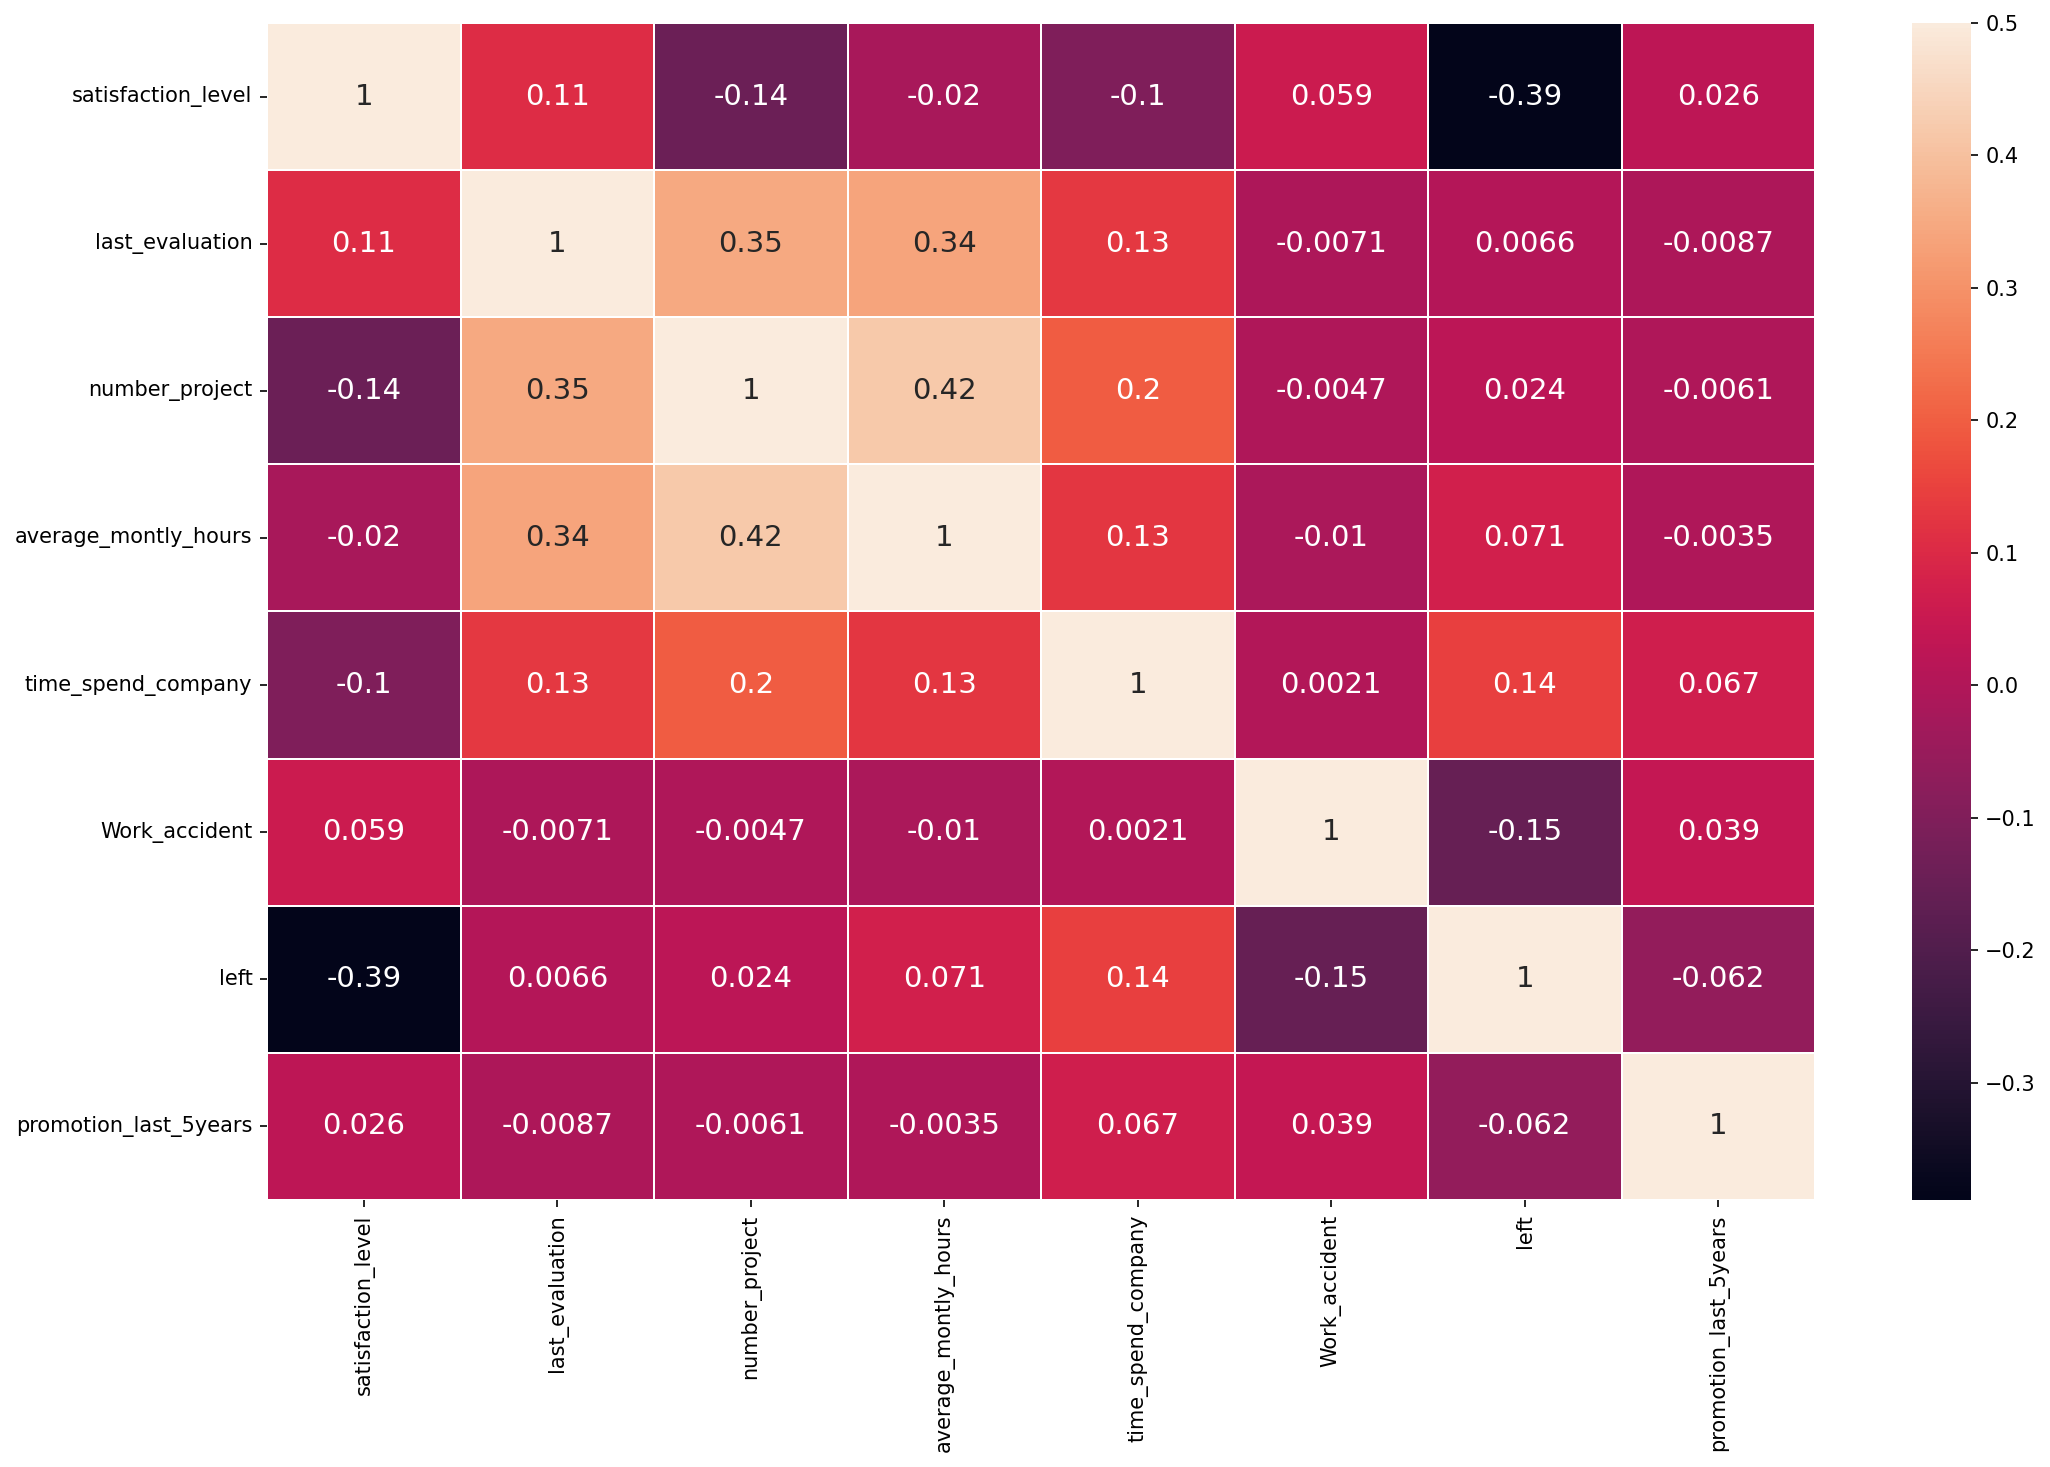

In [117]:
corr_df=raw_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_df,
            vmax=.5,
            annot=True,
            linewidths=.2)

#### Overview

In [118]:
columns = ['department','number_project','time_spend_company','promotion_last_5years', 'Work_accident', 'Employee_status', 'salary']

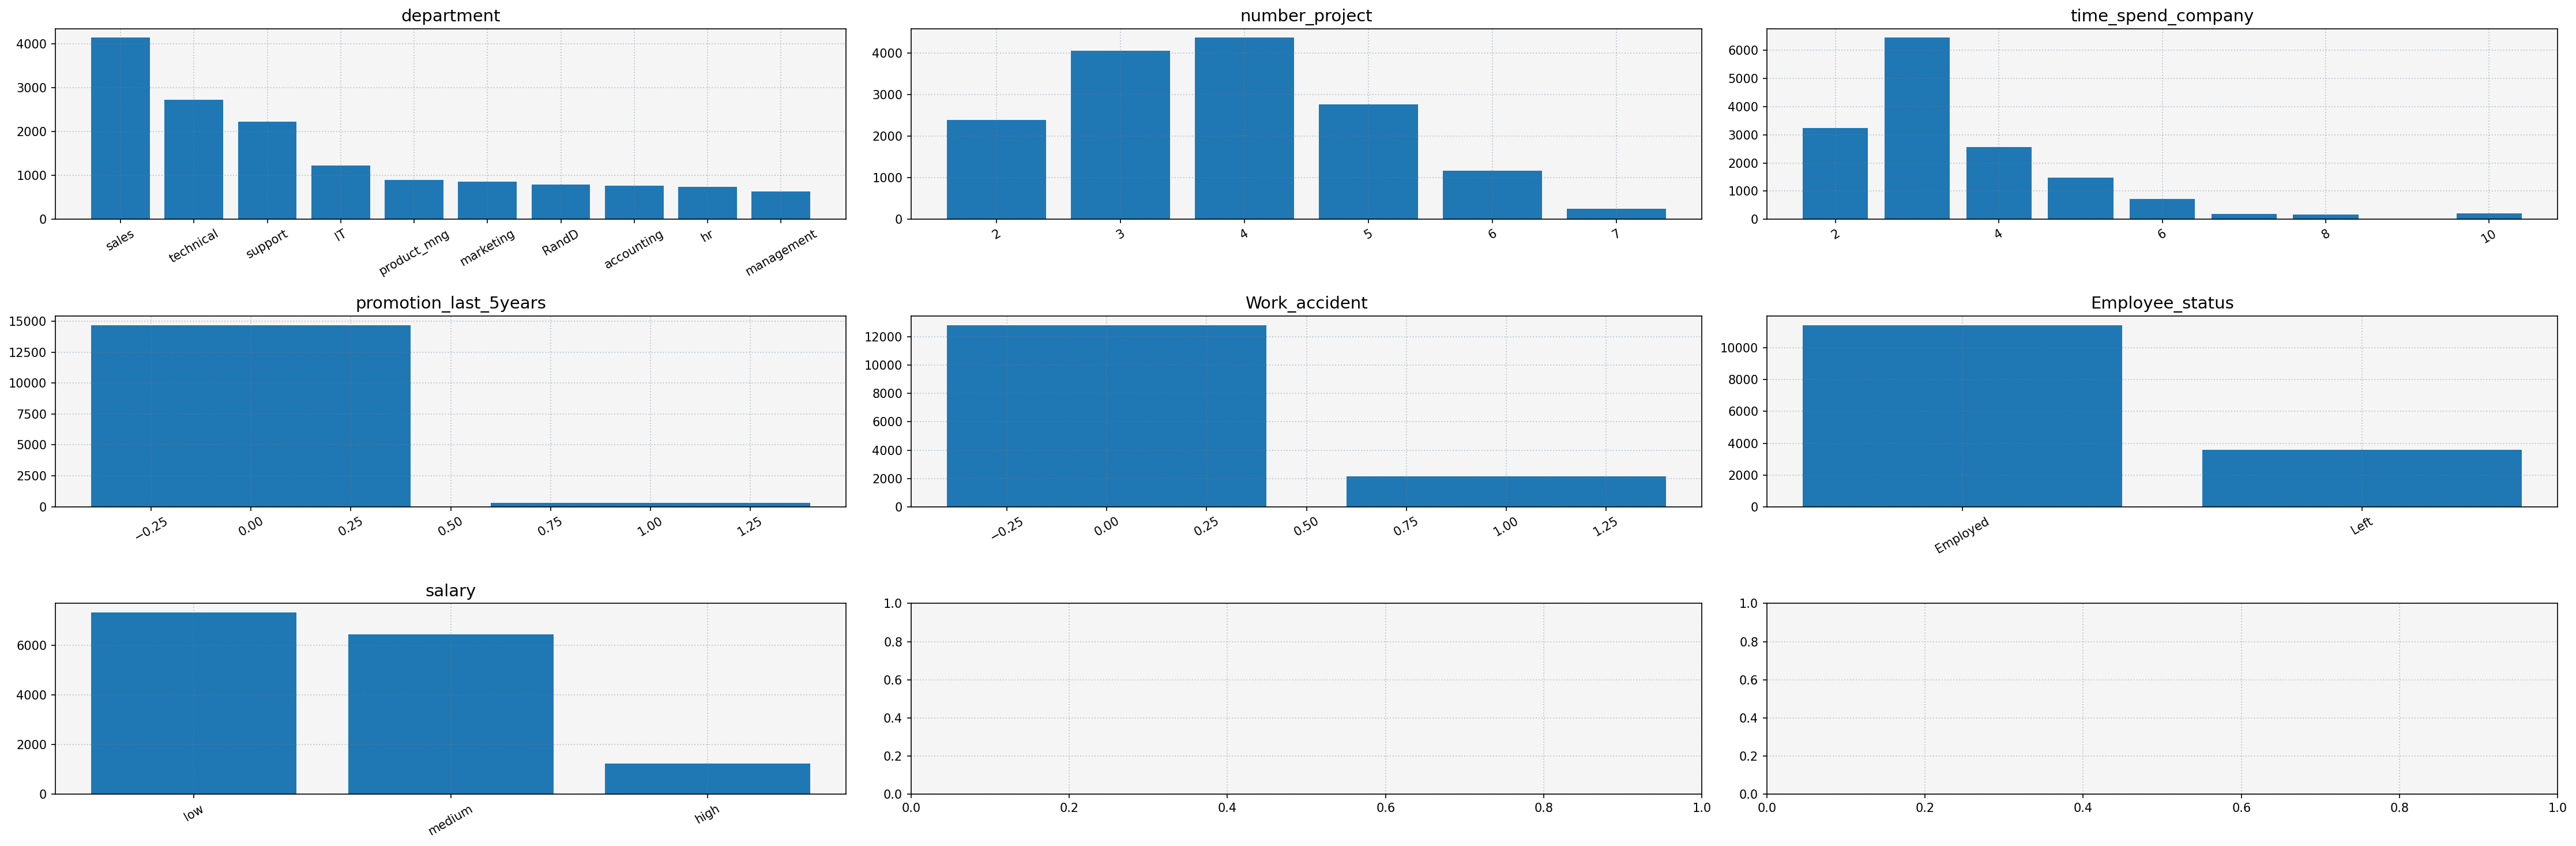

In [119]:
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(30, 10)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for col, ax in zip(columns, axs.flatten()):
    dftemp = raw_df[col].value_counts()
    ax.bar(dftemp.index, list(dftemp))
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=30)

plt.show()

Text(0, 0.5, 'Satisfaction Level')

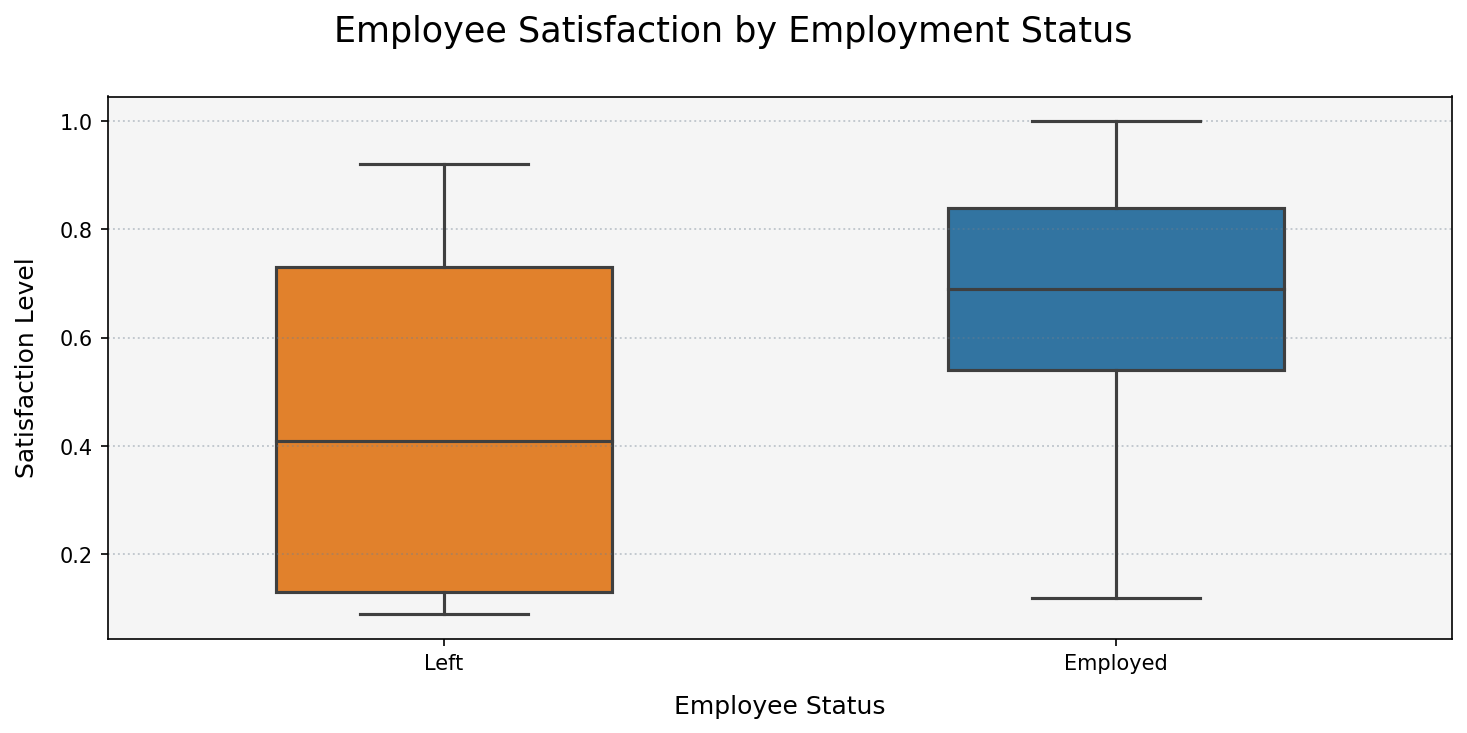

In [121]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Employee_status', y='satisfaction_level', data=raw_df, width=0.5, palette=["C1", "C0"])
plt.suptitle('Employee Satisfaction by Employment Status')
plt.xlabel('Employee Status')
plt.ylabel('Satisfaction Level')

Text(0.5, 1.0, 'Employee Evaluation Distribution - Left Vs Employed')

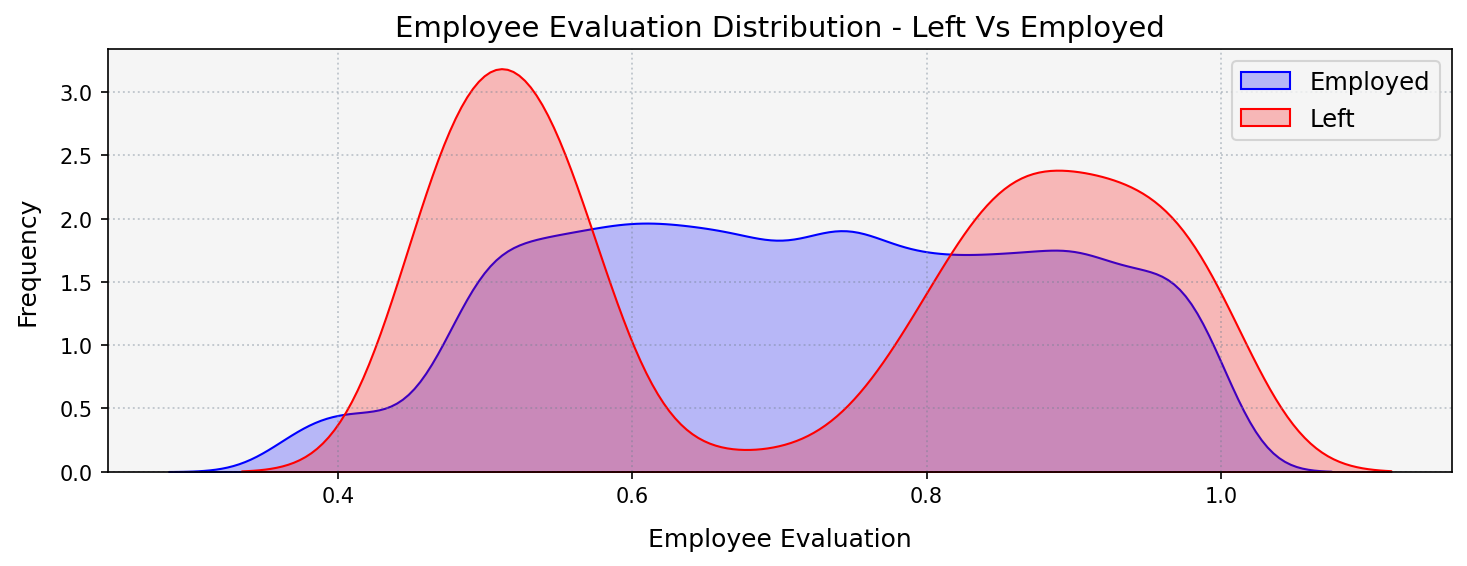

In [122]:
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(raw_df.loc[(raw_df['left'] == 0),'last_evaluation'] , color='b',shade=True,label='Employed')
ax=sns.kdeplot(raw_df.loc[(raw_df['left'] == 1),'last_evaluation'] , color='r',shade=True, label='Left')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
ax.legend()
plt.title('Employee Evaluation Distribution - Left Vs Employed')

Text(0.5, 1.0, 'Employee Average Monthly Hours Distribution - Left Vs Employed')

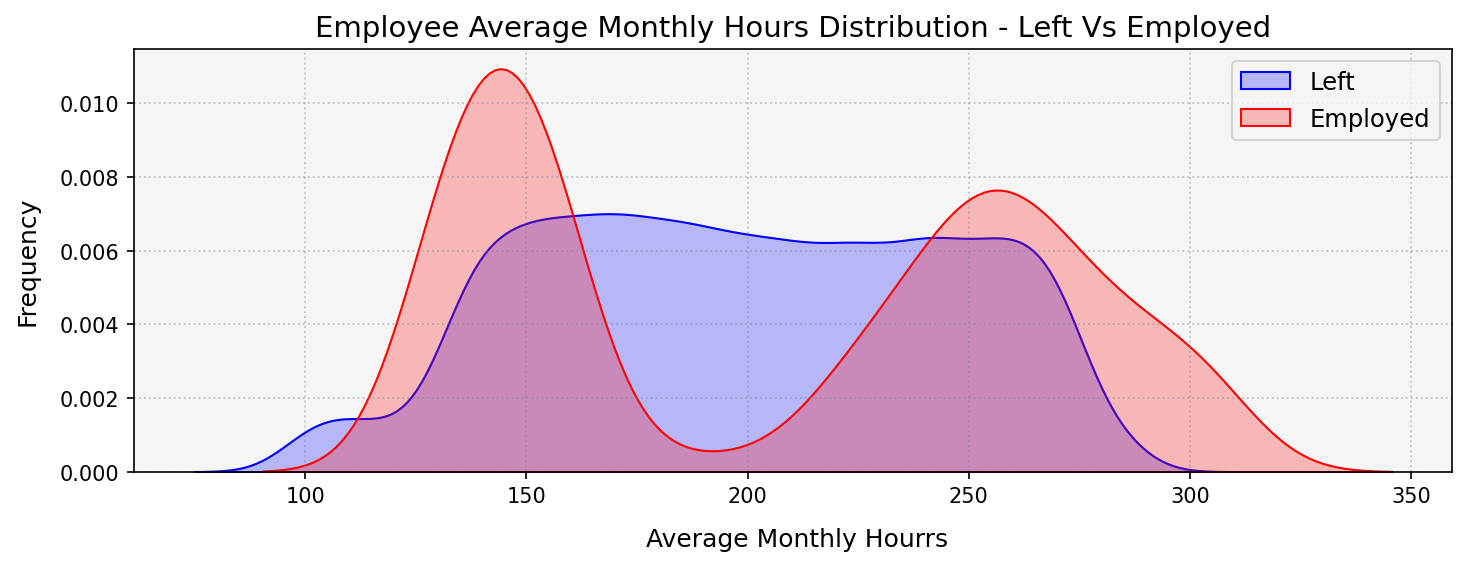

In [123]:
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(raw_df.loc[(raw_df['left'] == 0),'average_montly_hours'] , color='b',shade=True,label='Left', legend=True)
ax=sns.kdeplot(raw_df.loc[(raw_df['left'] == 1),'average_montly_hours'] , color='r',shade=True, label='Employed', legend=True)
ax.set(xlabel=' Average Monthly Hourrs', ylabel='Frequency')
ax.legend()
plt.title('Employee Average Monthly Hours Distribution - Left Vs Employed')

Text(0.5, 1.0, 'Employee Satisfaction Level Distribution - Left Vs Employed')

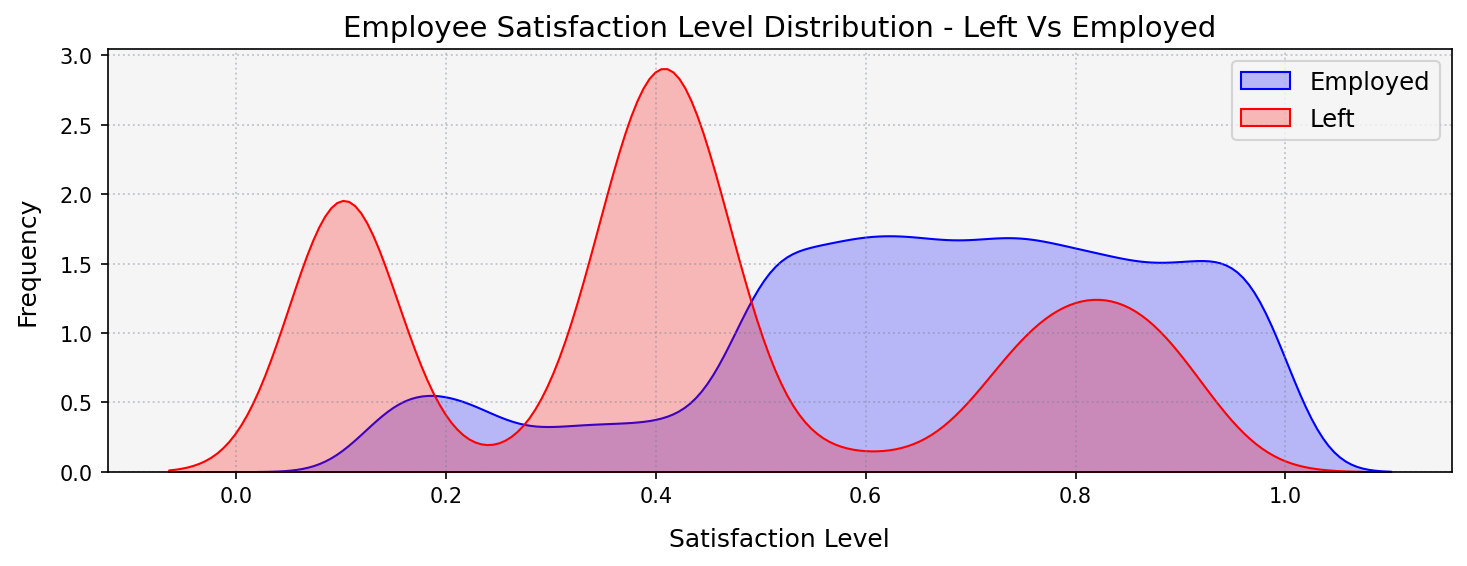

In [124]:
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(raw_df.loc[(raw_df['left'] == 0),'satisfaction_level'] , color='b',shade=True,label='Employed', legend=True)
ax=sns.kdeplot(raw_df.loc[(raw_df['left'] == 1),'satisfaction_level'] , color='r',shade=True, label='Left', legend=True)
ax.set(xlabel='Satisfaction Level', ylabel='Frequency')
ax.legend()
plt.title('Employee Satisfaction Level Distribution - Left Vs Employed')

Text(0, 0.5, 'Satisfaction Level')

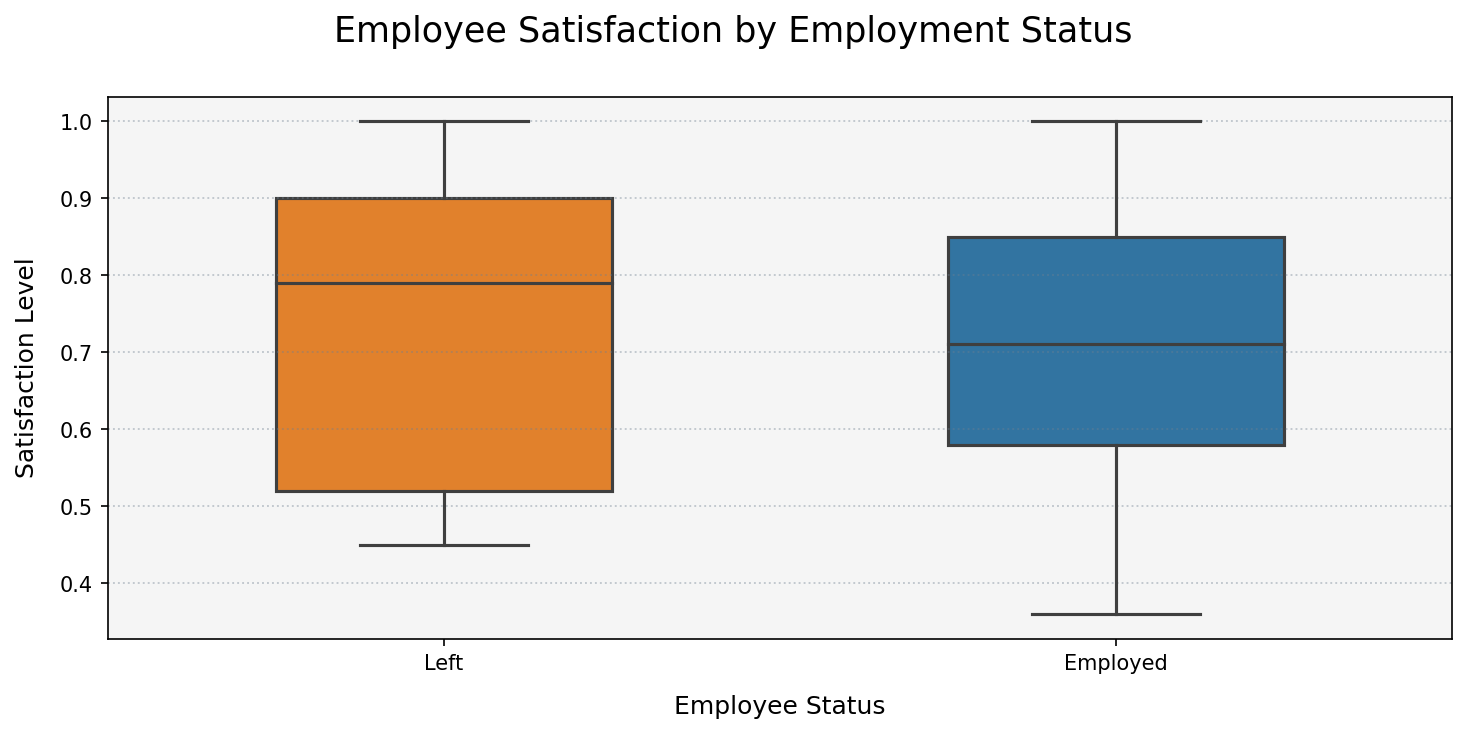

In [127]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Employee_status', y='last_evaluation', data=raw_df, width=0.5, palette=["C1", "C0"])
plt.suptitle('Employee Satisfaction by Employment Status')
plt.xlabel('Employee Status')
plt.ylabel('Satisfaction Level')

<AxesSubplot:title={'center':'Employee Status by Salary Level'}, xlabel='salary', ylabel='Count of Employees'>

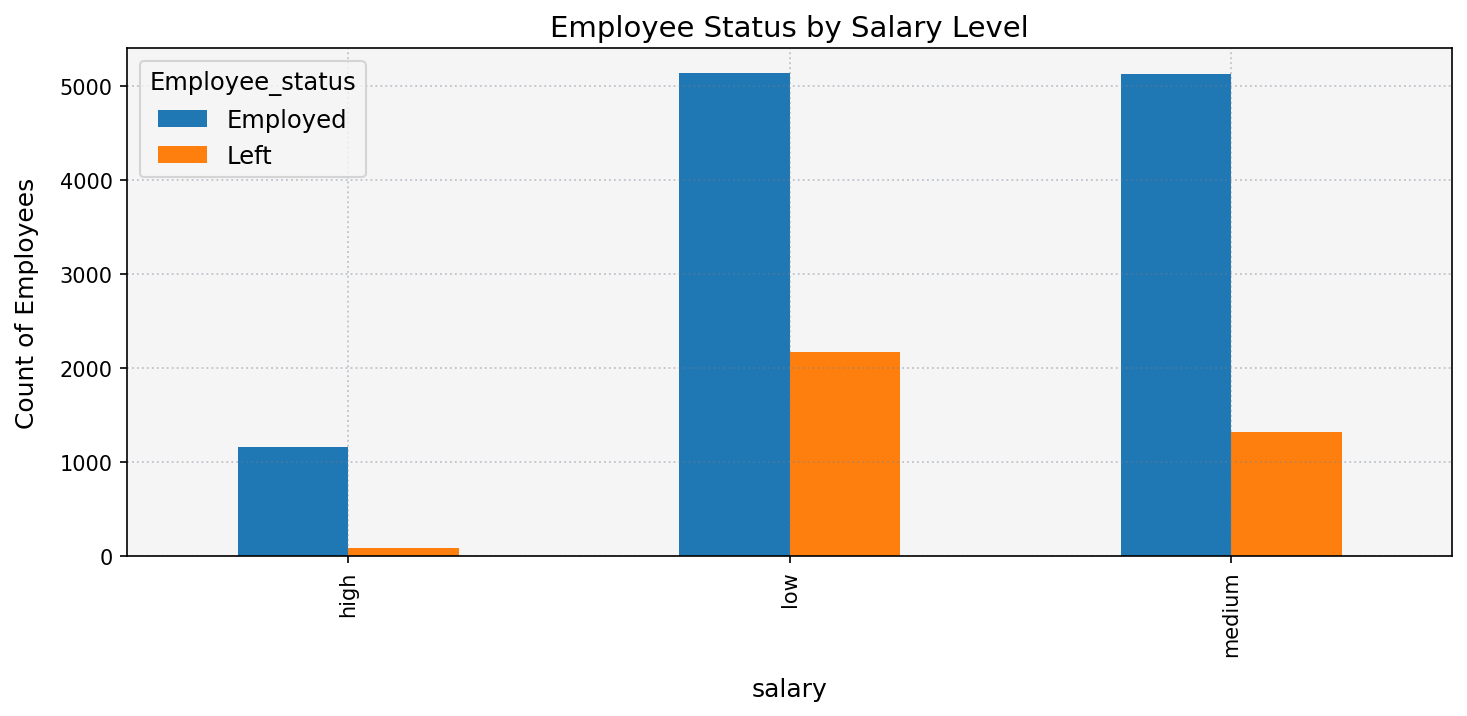

In [128]:
df=raw_df.groupby(['Employee_status', 'salary']).size().reset_index(name='counts')
df=df.pivot(columns='Employee_status', values='counts', index='salary')
df.plot(kind='bar', title='Employee Status by Salary Level', ylabel='Count of Employees', figsize=(10,5))

<AxesSubplot:title={'center':'Employee Status by Promotion in the Last Five Years'}, xlabel='Promotion in the last 5 years', ylabel='Count of Employees'>

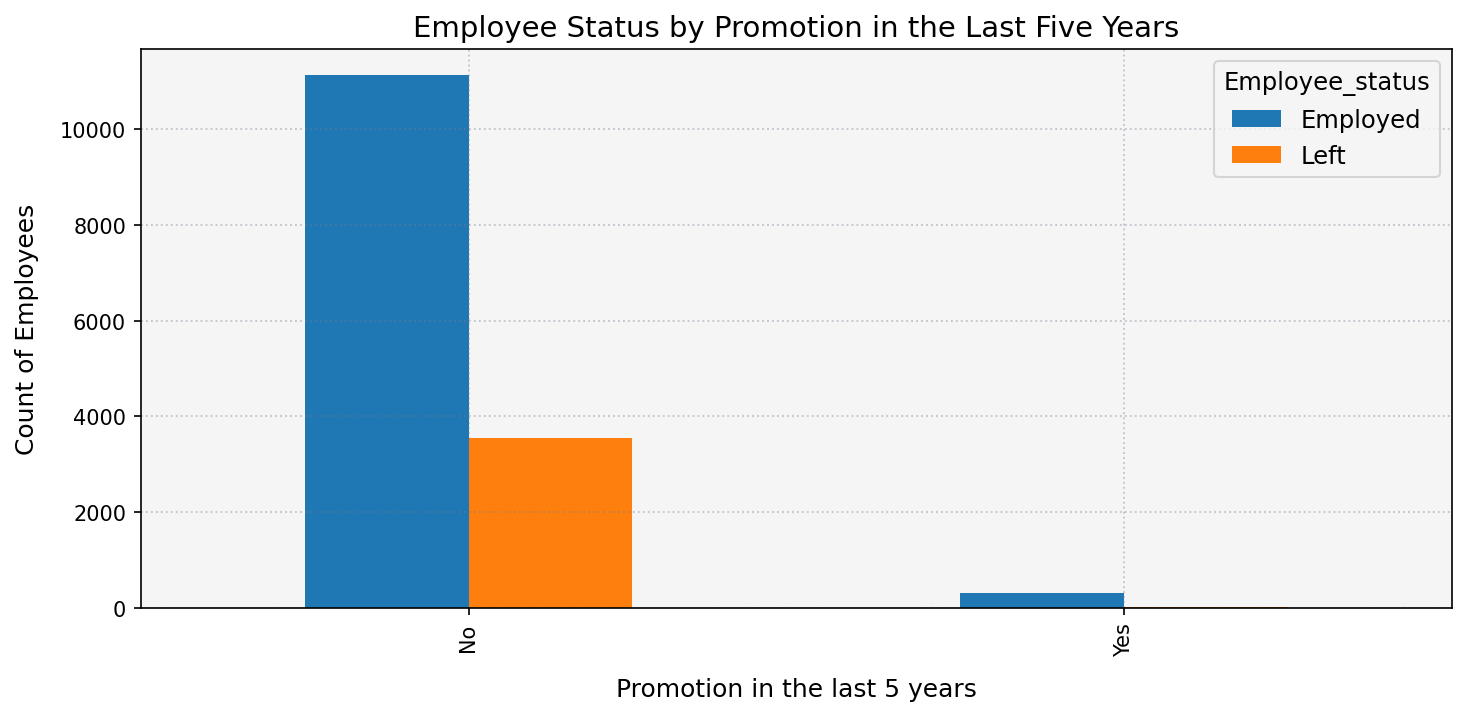

In [129]:
df=raw_df.groupby(['Employee_status', 'Promoted_in_last_5_years']).size().reset_index(name='counts')
df=df.pivot(columns='Employee_status', values='counts', index='Promoted_in_last_5_years')
df.plot(kind='bar', title='Employee Status by Promotion in the Last Five Years', ylabel='Count of Employees', xlabel = 'Promotion in the last 5 years', figsize=(10,5))

<AxesSubplot:title={'center':'Employee Status by Salary Level'}, xlabel='department', ylabel='Count of Employees'>

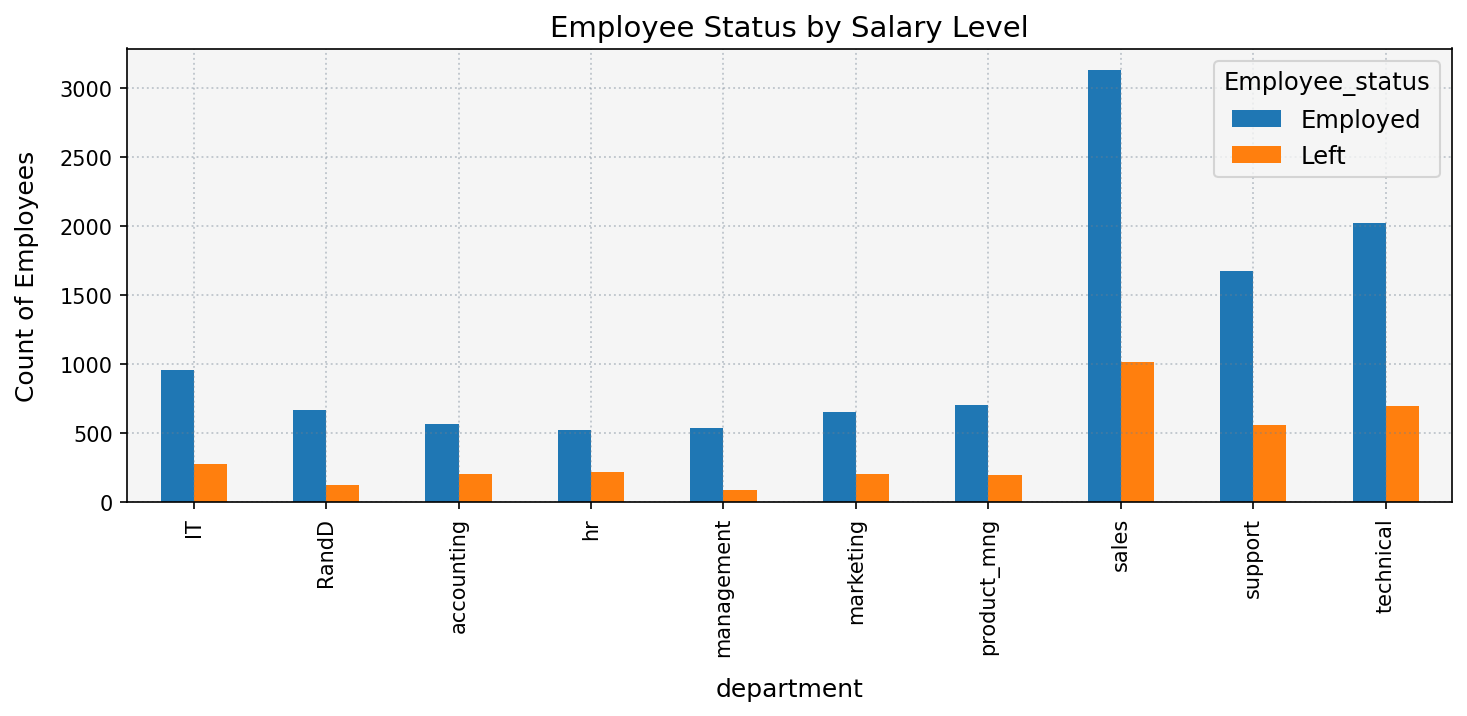

In [130]:
df=raw_df.groupby(['Employee_status', 'department']).size().reset_index(name='counts')
df=df.pivot(columns='Employee_status', values='counts', index='department')
df.plot(kind='bar', title='Employee Status by Salary Level', ylabel='Count of Employees', figsize=(10,5))

<AxesSubplot:title={'center':'Employee Status by Years Spent in the Company'}, xlabel='Years Spent at Company', ylabel='Count of Employees'>

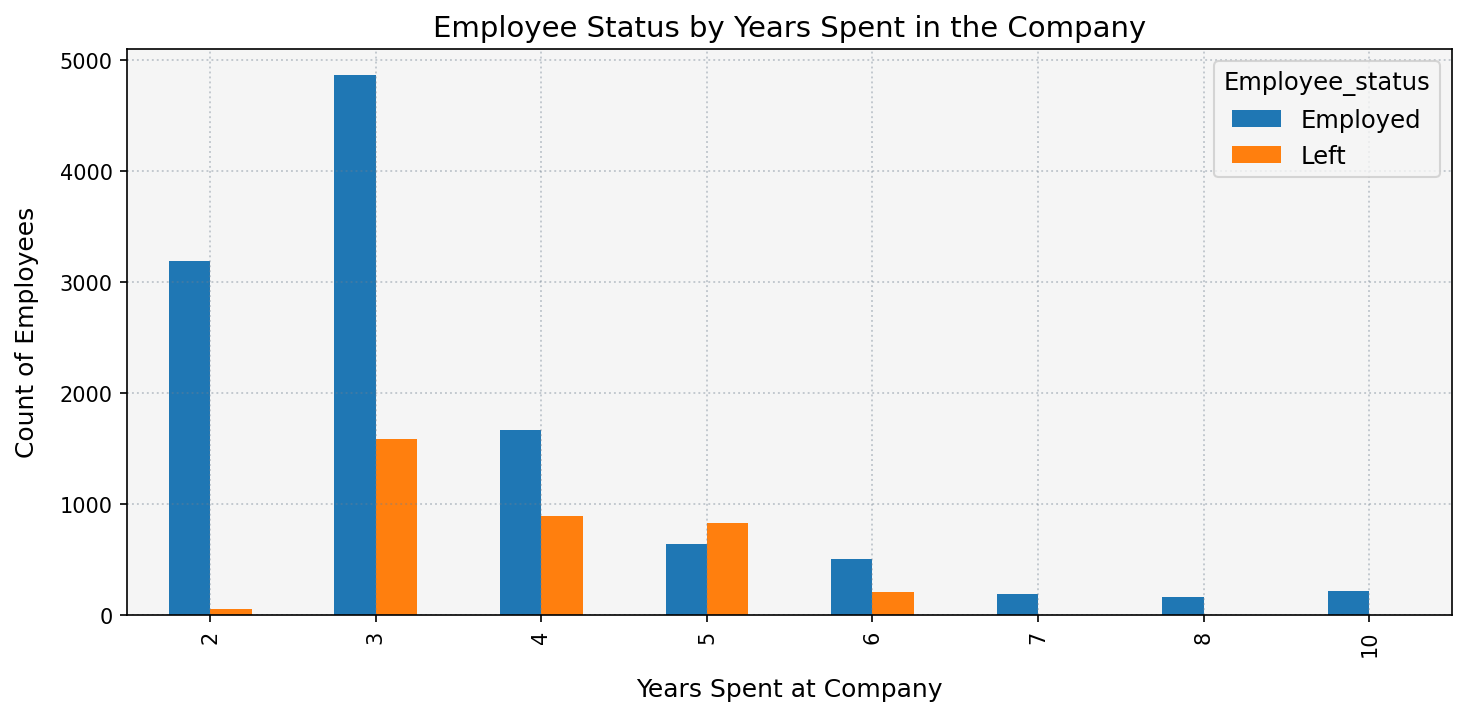

In [131]:
df=raw_df.groupby(['Employee_status', 'time_spend_company']).size().reset_index(name='counts')
df=df.pivot(columns='Employee_status', values='counts', index='time_spend_company')
df.plot(kind='bar', title='Employee Status by Years Spent in the Company', ylabel='Count of Employees', xlabel='Years Spent at Company', figsize=(10,5))

<AxesSubplot:title={'center':'Employee Status by Salary Level'}, xlabel='number_project', ylabel='Count of Employees'>

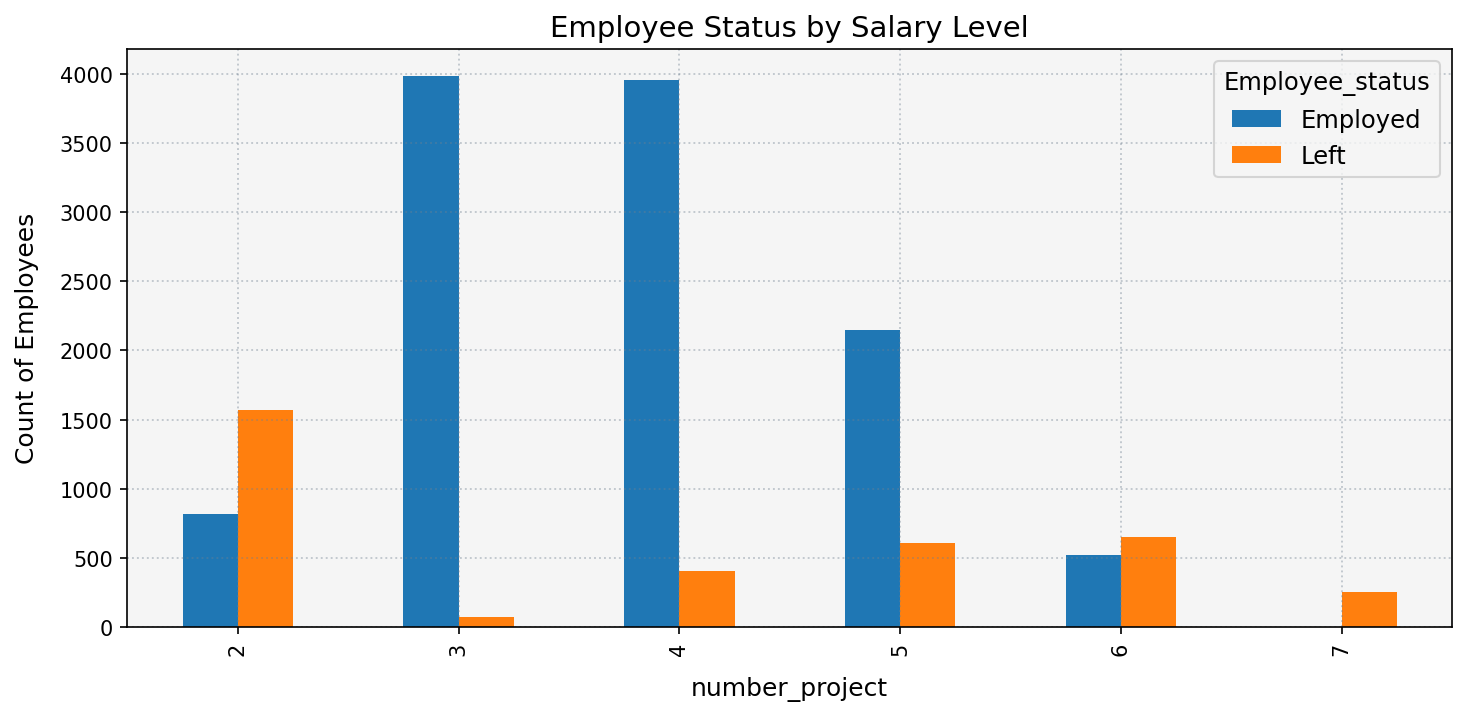

In [132]:
df=raw_df.groupby(['Employee_status', 'number_project']).size().reset_index(name='counts')
df=df.pivot(columns='Employee_status', values='counts', index='number_project')
df.plot(kind='bar', title='Employee Status by Salary Level', ylabel='Count of Employees', figsize=(10,5))

<AxesSubplot:title={'center':'Employee Status by Salary Level'}, xlabel='Work_accident', ylabel='Count of Employees'>

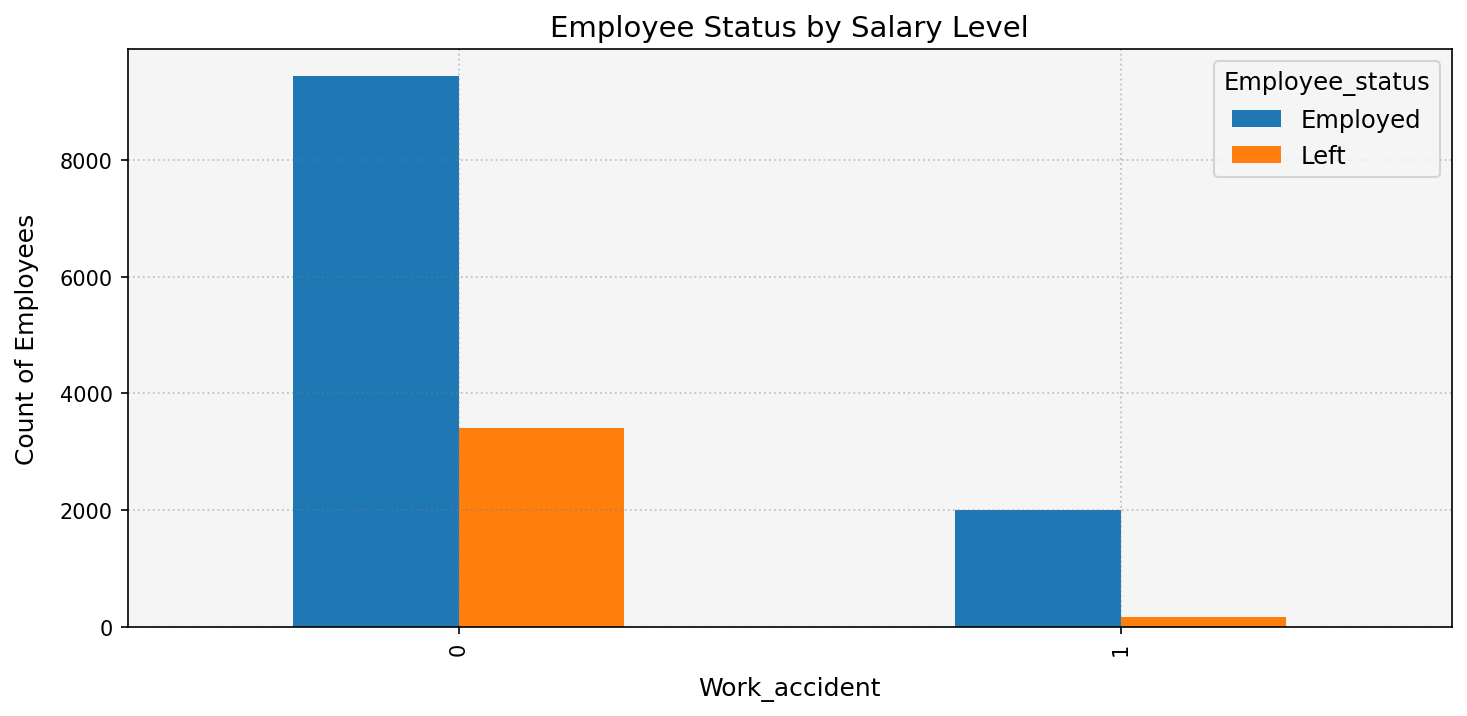

In [133]:
df=raw_df.groupby(['Employee_status', 'Work_accident']).size().reset_index(name='counts')
df=df.pivot(columns='Employee_status', values='counts', index='Work_accident')
df.plot(kind='bar', title='Employee Status by Salary Level', ylabel='Count of Employees', figsize=(10,5))

# Building a Predictive Model

In [136]:
df = pd.get_dummies(df, ['department', 'salary'], drop_first = True)

In [137]:
X = df.drop('left', axis=1)
y = df['left']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [138]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### 1. Score first on our training data

In [139]:
print('Score: ', dt.score(X_train, y_train))
print('Cross validation score, 10-fold cv: \n', cross_val_score(dt, X_train, y_train, cv=10))
print('Mean cross validation score: ', cross_val_score(dt,X_train,y_train,cv=10).mean())

Score:  1.0
Cross validation score, 10-fold cv: 
 [0.97619048 0.97714286 0.9752381  0.97619048 0.97047619 0.98571429
 0.97333333 0.97904762 0.97714286 0.98570067]
Mean cross validation score:  0.9778080711789006


### 2. Check the performance on our hold out group (test) using cross validation

In [140]:
predictions = dt.predict(X_test)

print('Score: ', dt.score(X_test, y_test))
print('Cross validation score, 10-fold cv: \n', cross_val_score(dt, X, y, cv=10))
print('Mean cross validation score: ', cross_val_score(dt,X,y,cv=10).mean())

Score:  0.9791111111111112
Cross validation score, 10-fold cv: 
 [0.984      0.98466667 0.97       0.96666667 0.96133333 0.978
 0.98866667 0.992      1.         1.        ]
Mean cross validation score:  0.9820666666666668


### Evaluate the model

Text(0.5, 1.0, 'Confusion Matrix')

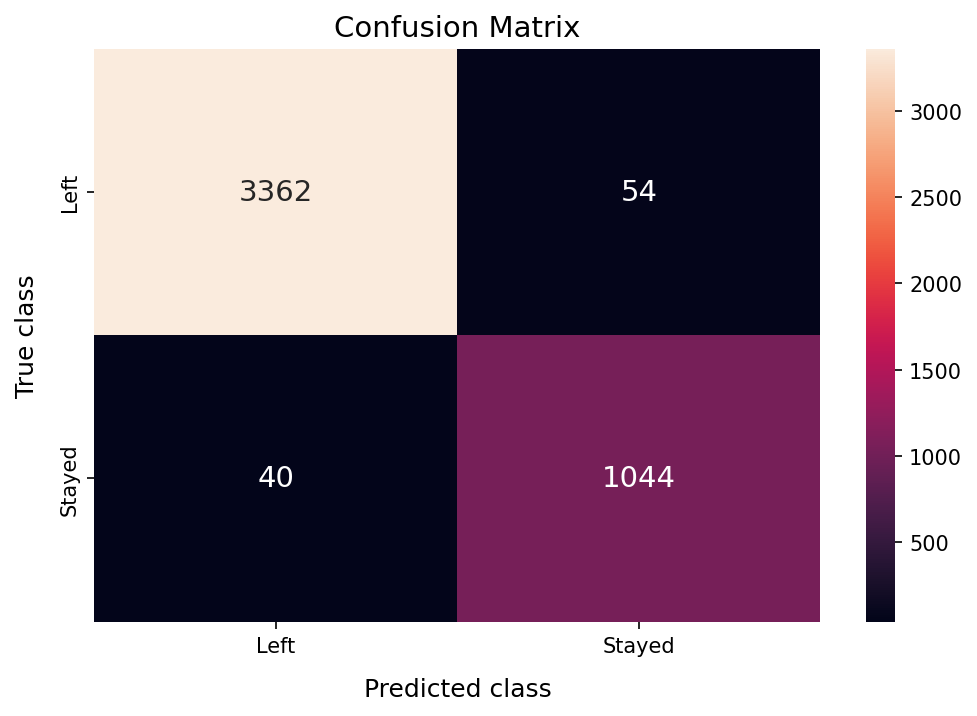

In [141]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.0f', xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

Area Under the Curve: 0.973645834233518


/home/jovyan/.conda-envs/analytics/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


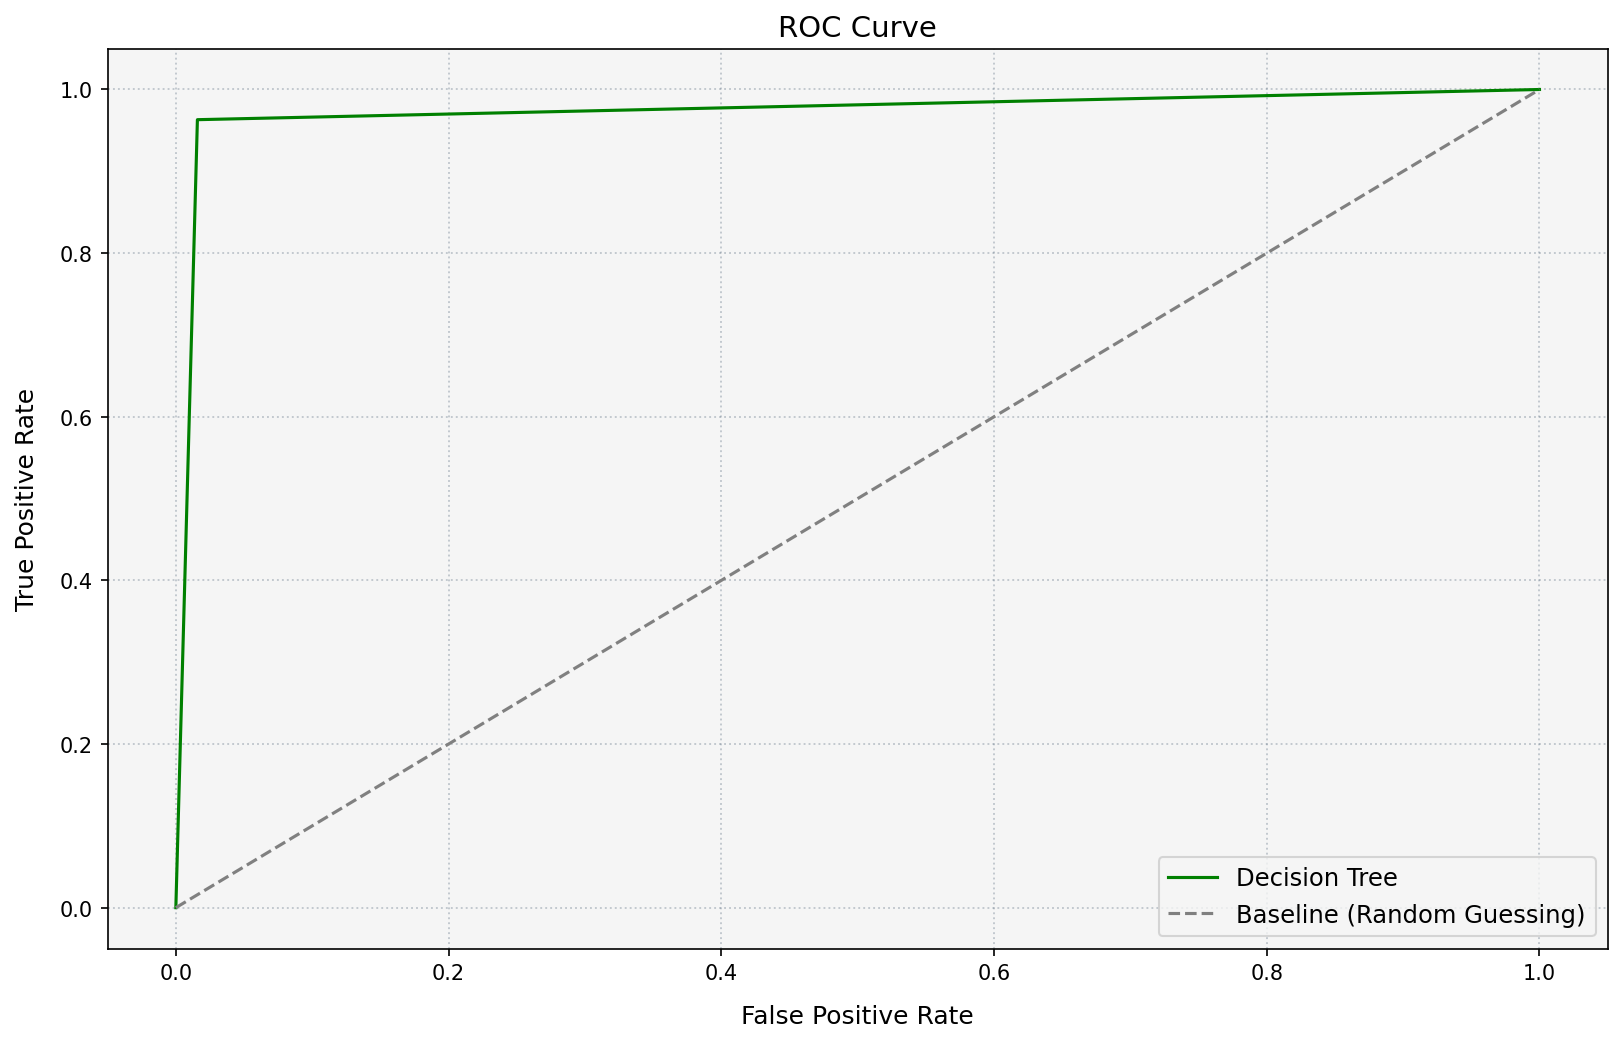

In [142]:
probabilities = dt.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

rates = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc = plt.figure(figsize = (10,6))
rocax = roc.add_axes([0,0,1,1])
rocax.plot(fpr, tpr, color='g', label='Decision Tree')
rocax.plot([0,1],[0,1], color='gray', ls='--', label='Baseline (Random Guessing)')
rocax.set_xlabel('False Positive Rate')
rocax.set_ylabel('True Positive Rate')
rocax.set_title('ROC Curve')
rocax.legend()

print('Area Under the Curve:', roc_auc_score(y_test, probabilities[:,1]))

In [143]:
importances = dt.feature_importances_
featureswithimportances = list(zip(X.columns, importances))
featureswithimportances.sort(key = lambda f: f[1], reverse=True)

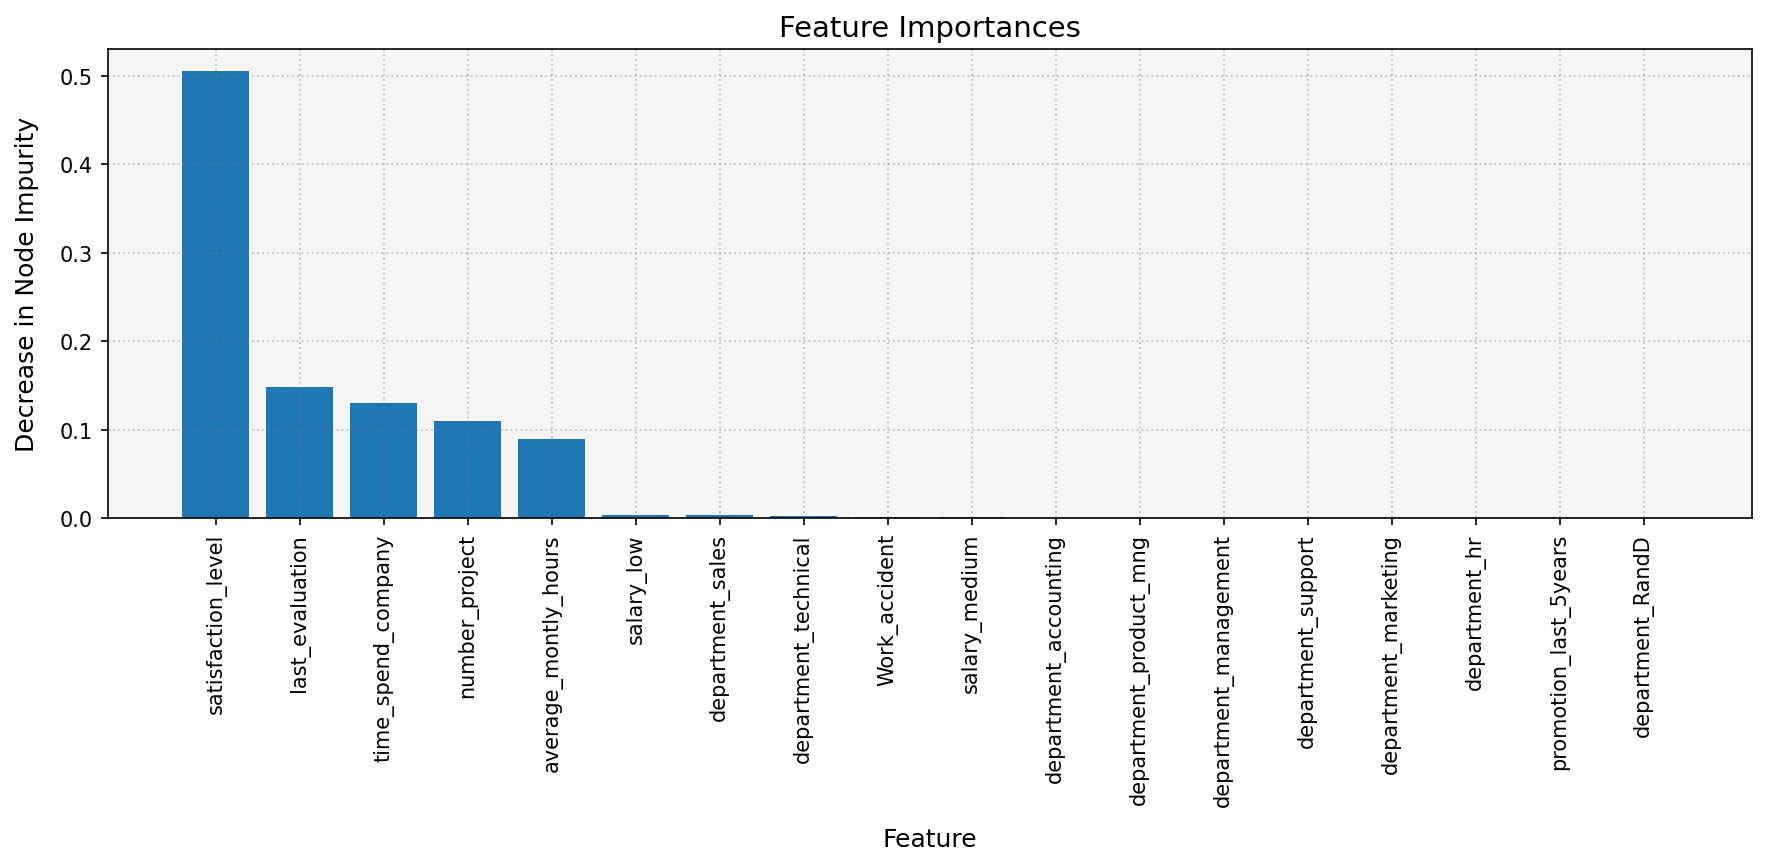

In [144]:
sorted_features, sorted_importances = zip(*featureswithimportances)
plt.figure(figsize=(12,6))
plt.bar(sorted_features, sorted_importances)
plt.title('Feature Importances')
plt.ylabel('Decrease in Node Impurity')
plt.xlabel('Feature')
plt.xticks(rotation=90);